In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from time import time
import logging

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
a = pd.read_pickle('shear_rate_0k')
b = pd.read_pickle('shear_rate_10k')
c = pd.read_pickle('shear_rate_20k')
d = pd.read_pickle('shear_rate_25k')
e = pd.read_pickle('shear_rate_30k')
f = pd.read_pickle('shear_rate_40k')
g = pd.read_pickle('shear_rate_50k')
h = pd.read_pickle('shear_rate_90k')
X=a
for i in [b,c,d,e,f,g,h]:
    X=X.append(i)

In [3]:
y = X[['shear rate']].values.ravel()
#print(y)
X=X.drop(columns=['shear rate'])
#print(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label=le.fit_transform(y_train)

label

array([7, 1, 7, ..., 7, 7, 1])

In [6]:
import sklearn.preprocessing as pre

x_scaler = pre.StandardScaler()
scaled_x = x_scaler.fit_transform(X_train)

In [7]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
#t0 = time()
#param_grid = {'C': [5e2, 1e3, 5e3, 1e4, 5e4],
#              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1], }
#clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
#                  param_grid, iid=False)
#clf = clf.fit(scaled_x, label)
#print("done in %0.3fs" % (time() - t0))
#print("Best estimator found by grid search:")
#print(clf.best_estimator_)

clf = SVC(C=1e4, gamma=1e-2)
clf = clf.fit(scaled_x, label)

Fitting the classifier to the training set


Predicting shear rate on the test set
done in 0.110s
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.48      0.21      0.29       159
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00       102
           5       0.45      0.64      0.53       234
           6       0.34      0.28      0.31       149
           7       0.70      0.95      0.80       636

    accuracy                           0.59      1392
   macro avg       0.24      0.26      0.24      1392
weighted avg       0.48      0.59      0.52      1392



/Users/wangyi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


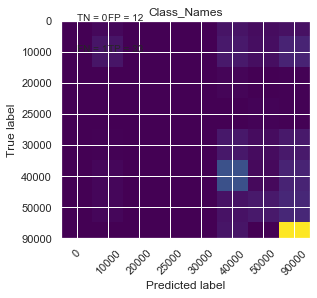

In [8]:
print("Predicting shear rate on the test set")
t0 = time()
y_pred = clf.predict(x_scaler.transform(X_test))
print("done in %0.3fs" % (time() - t0))

print(classification_report(le.transform(y_test), y_pred))

cm = confusion_matrix(le.transform(y_test), y_pred)

shear_rate=np.array([0,10000,20000,25000,30000,40000,50000,90000])
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('Class_Names')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(shear_rate))
plt.xticks(tick_marks, shear_rate, rotation=45)
plt.yticks(tick_marks, shear_rate)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [11]:
np.sum(le.transform(y_test)== y_pred)

826

In [ ]:
# find PCA components
from sklearn.preprocessing import normalize

X = normalize(X) #standardscaler!!!!
print(X)
pca = PCA(n_components=5)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)